In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Import data
sales_train = pd.read_csv('../Data/sales_train_merge.csv', index_col = 0, parse_dates = ['date'])
sales_test = pd.read_csv('../Data/sales_train_merge.csv', index_col = 0, parse_dates = ['date'])

C:\Users\Chiga\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-31,0,0,32,884.0,6.0,40
1,2013-01-31,0,0,33,1041.0,3.0,37
2,2013-01-31,0,0,35,247.0,1.0,40
3,2013-01-31,0,0,43,221.0,1.0,40
4,2013-01-31,0,0,51,257.0,2.0,57


In [4]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06
mean,1.466479e+01,3.280585e+01,1.068099e+04,1.625363e+03,2.267200e+00,4.154192e+01
std,9.542322e+00,1.653701e+01,6.238883e+03,5.701611e+03,8.649882e+00,1.632365e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-02,-2.200000e+01,0.000000e+00
25%,6.000000e+00,2.100000e+01,5.045000e+03,2.490000e+02,1.000000e+00,3.000000e+01
50%,1.400000e+01,3.100000e+01,1.049700e+04,4.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.606000e+04,1.398000e+03,2.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,6.719300e+05,2.253000e+03,8.300000e+01


In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609124 entries, 0 to 1609123
Data columns (total 7 columns):
date                1609124 non-null datetime64[ns]
date_block_num      1609124 non-null int64
shop_id             1609124 non-null int64
item_id             1609124 non-null int64
item_price          1609124 non-null float64
item_cnt_day        1609124 non-null float64
item_category_id    1609124 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 98.2 MB


As stated in the Data Wrangling notebook, the objective of this problem is to forecast the total amount of products sold in every shop, specifically for the provided test set. It's also noted that the list of shops and products change from month to month which needs to be accounted for. This poses a problem as we'll need to visualize which shops and items are available for which months.

In [18]:
sales_train_grouped = sales_train[['date_block_num', 'shop_id', 'item_category_id','item_cnt_day']].groupby(['date_block_num', 'shop_id', 'item_category_id']).sum()

sales_train_grouped.reset_index(inplace=True)

In [37]:
def plot_item_shop(shop_id, item_cat_id):
    df = sales_train_grouped[(sales_train_grouped['shop_id'] == shop_id) & (sales_train_grouped['item_category_id'] == item_cat_id)]
    
    _ = plt.figure(figsize = (15,15))
    _ = plt.plot(df['date_block_num'], df['item_cnt_day'])

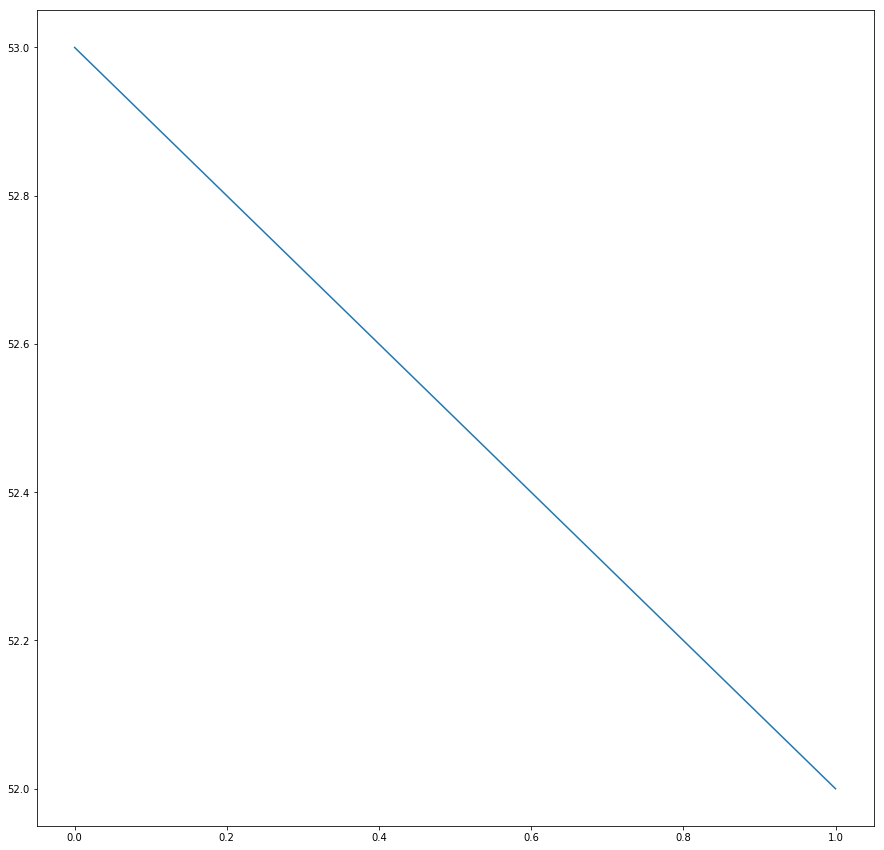

In [38]:
plot_item_shop(shop_id = 0, item_cat_id = 2)